## Intro to Data Science
### MidTerm Project:
* **Data source**: 'accidents_2017_csv'
* Barcelona data sets available on **KAGGLE**

This dataset contains data about traffic accidents ocurred in Barcelona city in 2017.

### Loading Data:

In [1]:
# Importing requiered libraries
import pandas as pd

In [2]:
# Importing data from .csv file and creating a pandas' DataFrame 
df = pd.read_csv('accidents_2017.csv')

### Basic Exploration:

In [3]:
# Head
df.head(3)

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360885


In [4]:
# Tail
df.tail(3)

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
10336,2017S010718,Sant Andreu,el Bon Pastor,Litoral (Llobregat) ...,Thursday,December,28,8,Morning,1,0,1,2,2.205607,41.443894
10337,2017S006145,Sant Andreu,el Bon Pastor,Litoral (Besòs) ...,Friday,July,14,14,Afternoon,1,0,1,2,2.205118,41.444824
10338,2017S000178,Sant Andreu,el Bon Pastor,CIUTAT D'ASUNCIÓN ...,Sunday,January,8,20,Afternoon,0,0,0,1,2.200956,41.437125


In [5]:
# Type of data structure
type(df)

pandas.core.frame.DataFrame

In [6]:
# Dimension of the DataFrame 
df.shape

(10339, 15)

In [7]:
# Columns' name
df.columns

Index(['Id', 'District Name', 'Neighborhood Name', 'Street', 'Weekday',
       'Month', 'Day', 'Hour', 'Part of the day', 'Mild injuries',
       'Serious injuries', 'Victims', 'Vehicles involved', 'Longitude',
       'Latitude'],
      dtype='object')

In [8]:
# Accesing the index
df.index

RangeIndex(start=0, stop=10339, step=1)

In [9]:
#Data types 
df.dtypes

Id                    object
District Name         object
Neighborhood Name     object
Street                object
Weekday               object
Month                 object
Day                    int64
Hour                   int64
Part of the day       object
Mild injuries          int64
Serious injuries       int64
Victims                int64
Vehicles involved      int64
Longitude            float64
Latitude             float64
dtype: object

In [10]:
# Checking null values
df.isnull().sum()

Id                   0
District Name        0
Neighborhood Name    0
Street               0
Weekday              0
Month                0
Day                  0
Hour                 0
Part of the day      0
Mild injuries        0
Serious injuries     0
Victims              0
Vehicles involved    0
Longitude            0
Latitude             0
dtype: int64

In [11]:
# Describe 'quantitative' variable
df['Victims'].describe()

count    10339.000000
mean         1.178644
std          0.735145
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         10.000000
Name: Victims, dtype: float64

In [12]:
type(df['Victims'])

pandas.core.series.Series

In [13]:
# Describe 'qualitative' variable
df['Month'].describe()

count        10339
unique          12
top       November
freq           991
Name: Month, dtype: object

### Data Visualization:

In [14]:
# Importing requiered libraries
import matplotlib.pyplot as plt

# Setting plot space as inline for inline plots
%matplotlib inline

#### * Severity

In [15]:
# Total number of accidents indexing by number of victims involved
df.groupby('Victims').size()

Victims
0      902
1     7385
2     1611
3      284
4      102
5       32
6       11
7        8
8        1
9        1
10       2
dtype: int64

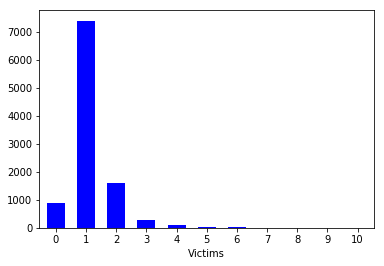

In [16]:
# Visualization
df.groupby('Victims').size().plot(kind='bar',color='b',width=0.60)
plt.xticks(rotation=0)
plt.show()

In [17]:
# Total number of victims per Month in 2017
(df.groupby(['Month'])[['Victims']].sum()).sort_values(by='Victims', ascending=False)


,Victims
Month,
November,1211
July,1103
May,1092
June,1087
March,1087
October,1078
January,991
September,958
February,942


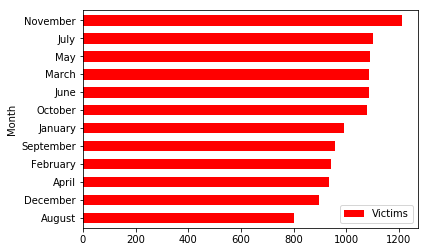

In [18]:
# Visualization
(df.groupby(['Month'])[['Victims']].sum()).sort_values(by='Victims', ascending=True).plot(kind='barh',color='r',width=0.60)
plt.xticks(rotation=0)
plt.show()

In [19]:
# Total number of victims per Weekday in 2017
(df.groupby(['Weekday'])[['Victims']].sum()).sort_values(by='Victims', ascending=False)

,Victims
Weekday,
Friday,2031
Tuesday,1982
Thursday,1981
Wednesday,1903
Monday,1755
Saturday,1448
Sunday,1086


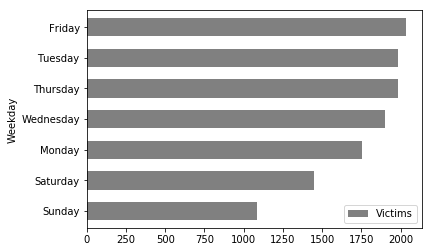

In [20]:
# Visualization
(df.groupby(['Weekday'])[['Victims']].sum()).sort_values(by='Victims', ascending=True).plot(kind='barh',color='grey',width=0.60)
plt.xticks(rotation=0)
plt.show()

In [21]:
# Comparing nnumber of accidents along the week in 2017
a = ['Monday', 'Tuesday', 'Wednesday', 'Thursday']
b = ['Friday']
d = []
e = []
f = []

for day in df['Weekday']:
    if day in a:
        d.append(day)
    elif day in b:
        e.append(day)
    else:
        f.append(day)

print('The total number of accidents from Monday to Thursday is: ',len(d))
print('The total number of accidents on Friday is: ',len(e))
print('The total number of accidents on the Weekends: ',len(f))

The total number of accidents from Monday to Thursday is:  6528
The total number of accidents on Friday is:  1761
The total number of accidents on the Weekends:  2050


In [22]:
# NUmber of victims by part of the day in 2017
(df.groupby(['Part of the day'])[['Victims']].sum()).sort_values(by='Victims', ascending=False)

,Victims
Part of the day,
Afternoon,6092
Morning,4712
Night,1382


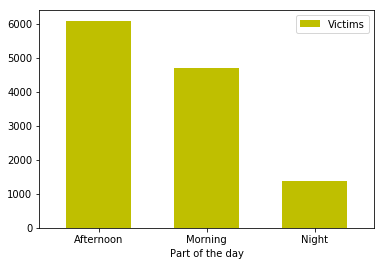

In [23]:
# Visualization
(df.groupby(['Part of the day'])[['Victims']].sum()).sort_values(by='Victims', ascending=False).plot(kind='bar',color='y',width=0.60)
plt.xticks(rotation=0)
plt.show()

In [24]:
# Total number of victims per hour in 2017
(df.groupby(['Hour'])[['Victims']].sum()).sort_values(by='Victims', ascending=False).head(10)

,Victims
Hour,
14,916
13,848
18,794
16,780
17,760
19,756
12,745
15,744
20,738


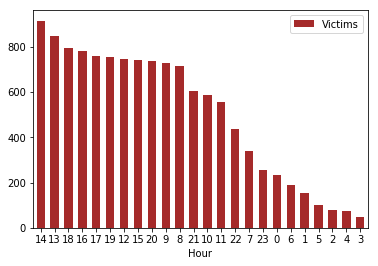

In [25]:
# Visualization
(df.groupby(['Hour'])[['Victims']].sum()).sort_values(by='Victims', ascending=False).sort_values(by='Victims', ascending=False).plot(kind='bar',color='brown',width=0.60)
plt.xticks(rotation=0)
plt.show()

#### * Geolocation

In [26]:
# Total number of victims by district in 2017
(df.groupby(['District Name'])[['Victims']].sum()).sort_values(by='Victims', ascending=False)

,Victims
District Name,
Eixample,3562
Sant Martí,1645
Sants-Montjuïc,1329
Sarrià-Sant Gervasi,1290
Les Corts,894
Horta-Guinardó,839
Sant Andreu,704
Nou Barris,661
Ciutat Vella,634


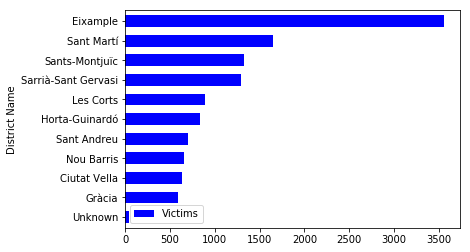

In [27]:
# Visualization
(df.groupby(['District Name'])[['Victims']].sum()).sort_values(by='Victims', ascending=True).plot(kind='barh',color='b',width=0.60)
plt.xticks(rotation=0)
plt.show()

In [28]:
# Importing requiered libraries
import folium

In [29]:
# Creating a map of the area
lat_bcn = 41.3818 
long_bcn = 2.1685 

bcn_map = folium.Map([lat_bcn, long_bcn])

# specifying the number of victims per accident 
vic = 2

for row in df[:200].index:
    lat = df['Latitude'][row]
    long = df['Longitude'][row]
    id = df['Id'][row]
    district = df['District Name'][row]
    victims = df['Victims'][row]
    #details = 'Id: {} District: {} Victima:{}'.format(id,district,victims)
    #marker = folium.Marker([lat, long])
    #marker.add_to(bcn_map)
    folium.CircleMarker([lat,long], radius = 3,  color='red' if victims > vic else 'blue', \
           fill_color='red' if victims > vic else 'blue').add_to(bcn_map)
bcn_map

#### Correlations between variables

In [30]:
import numpy as np

In [31]:
# Matrix of correlations
df.corr()

,Day,Hour,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
Day,1.000000,0.012877,0.006975,-0.001686,0.006407,-0.010914,-0.017236,-0.006184
Hour,0.012877,1.000000,0.042420,-0.007614,0.040177,-0.022223,-0.006215,0.018699
Mild injuries,0.006975,0.042420,1.000000,-0.150482,0.974272,0.160052,0.008475,0.014091
Serious injuries,-0.001686,-0.007614,-0.150482,1.000000,0.071450,-0.015678,0.005372,0.000299
Victims,0.006407,0.040177,0.974272,0.071450,1.000000,0.157185,0.009355,0.013520
Vehicles involved,-0.010914,-0.022223,0.160052,-0.015678,0.157185,1.000000,-0.006864,0.002440
Longitude,-0.017236,-0.006215,0.008475,0.005372,0.009355,-0.006864,1.000000,0.396106
Latitude,-0.006184,0.018699,0.014091,0.000299,0.013520,0.002440,0.396106,1.000000


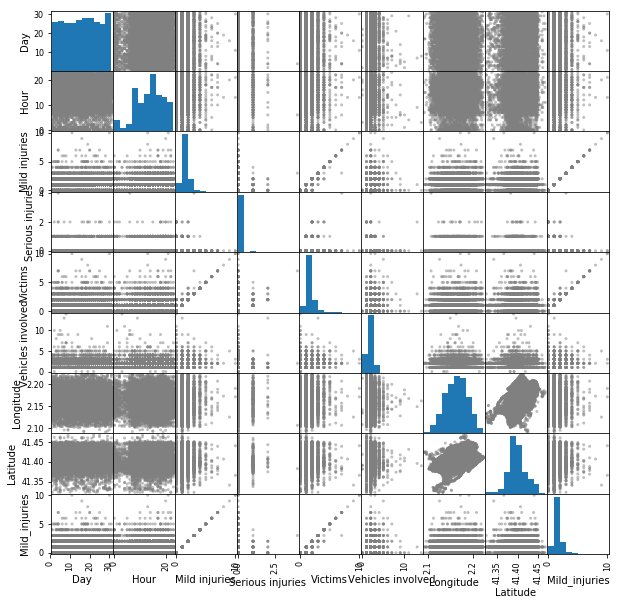

In [50]:
# Matrix of correlations
pd.plotting.scatter_matrix(df, figsize=(10,10), color='grey');

In [33]:
# Matrix of covariance
df.cov()

,Day,Hour,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
Day,76.798143,0.599941,0.045373,-0.002420,0.041279,-0.068293,-0.003652,-0.001152
Hour,0.599941,28.265063,0.167406,-0.006630,0.157028,-0.084358,-0.000799,0.002113
Mild injuries,0.045373,0.167406,0.551001,-0.018297,0.531654,0.084829,0.000152,0.000222
Serious injuries,-0.002420,-0.006630,-0.018297,0.026831,0.008604,-0.001834,0.000021,0.000001
Victims,0.041279,0.157028,0.531654,0.008604,0.540438,0.082506,0.000166,0.000211
Vehicles involved,-0.068293,-0.084358,0.084829,-0.001834,0.082506,0.509812,-0.000118,0.000037
Longitude,-0.003652,-0.000799,0.000152,0.000021,0.000166,-0.000118,0.000584,0.000204
Latitude,-0.001152,0.002113,0.000222,0.000001,0.000211,0.000037,0.000204,0.000452


In [34]:
import seaborn as sns

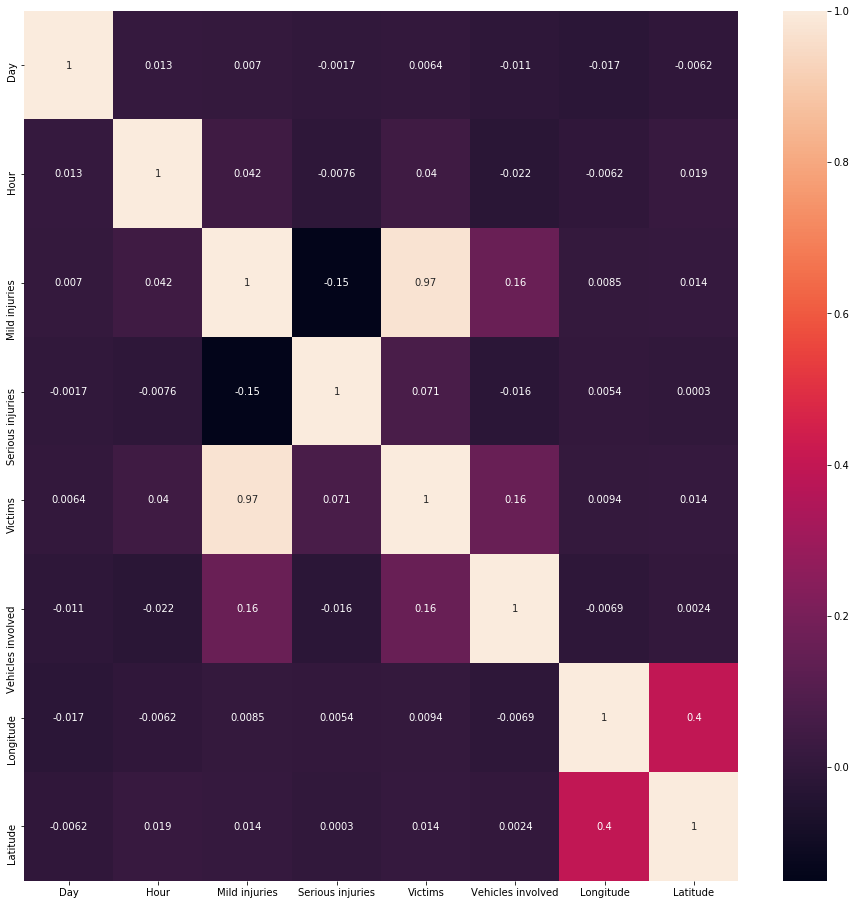

In [35]:
# The heatmap
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [36]:
# calculating r value (coefficient of correlation) between 2 variables 
feat1 = 'Victims'
feat2 = 'Mild injuries'

corr = np.corrcoef(df[feat1], df[feat2])
r = corr[1][0]
print (corr)
print ('\t')
print (r)

[[1.         0.97427221]
 [0.97427221 1.        ]]
	
0.9742722148964394


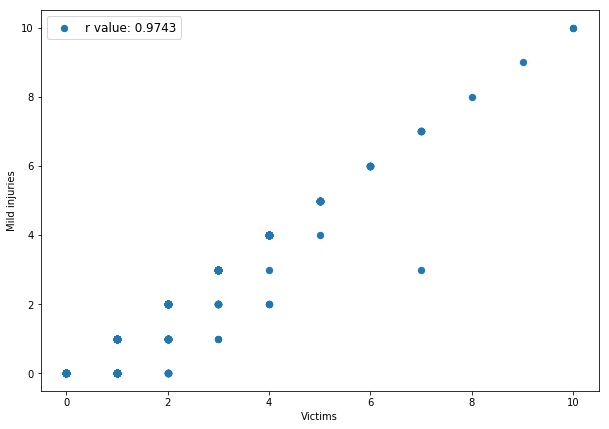

In [37]:
# scatter plot 
plt.figure(figsize=(10,7))
plt.scatter(df[feat1], df[feat2],s=40,marker='o', label = 'r value: %.4f'%(r))
plt.legend(fontsize=12)
plt.xlabel('%s'%(feat1))
plt.ylabel('%s'%(feat2))
plt.show()

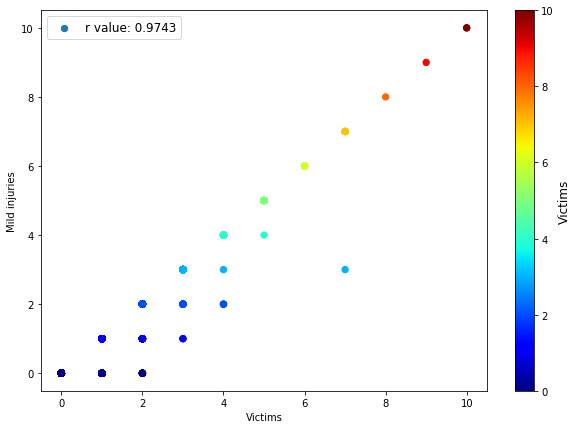

In [38]:
# scatter plot with colour bar 
plt.figure(figsize=(10,7))
plt.scatter(df[feat1], df[feat2],c=df[feat2],s=40,marker='o',cmap='jet', label = 'r value: %.4f'%(r))
#plt.annotate("r value: " + str(r), (7,8), fontsize=15)
plt.legend( fontsize=12)
plt.xlabel('%s'%(feat1))
plt.ylabel('%s'%(feat2))
# insert a color bar 
plt.colorbar().set_label('%s'%(feat1),fontsize=12)
plt.show()

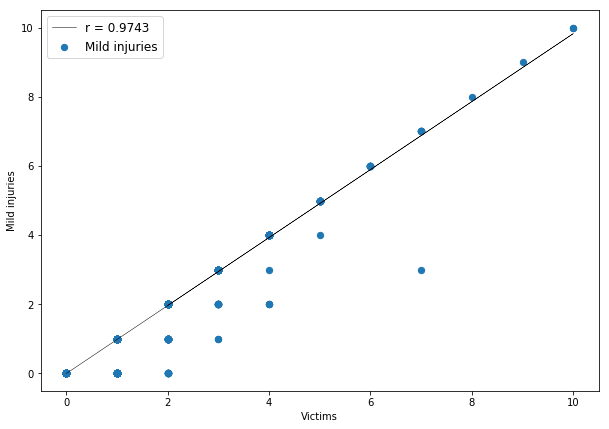

In [39]:
# line(trend) from linear correlation
fit = np.polyfit(df[feat1],df[feat2],1)
# scatter plot
plt.figure(figsize=(10,7))
plt.scatter(df[feat1], df[feat2],s=40,marker='o') #, label = 'r value: %.4f'%(r))
plt.xlabel('%s'%(feat1))
plt.ylabel('%s'%(feat2))
# insert a line trend
plt.plot(df[feat1],np.polyval(fit,df[feat1]),color='black',linewidth=0.5, label = 'r = %.4f'%(r))
plt.legend(fontsize=12)
plt.show()

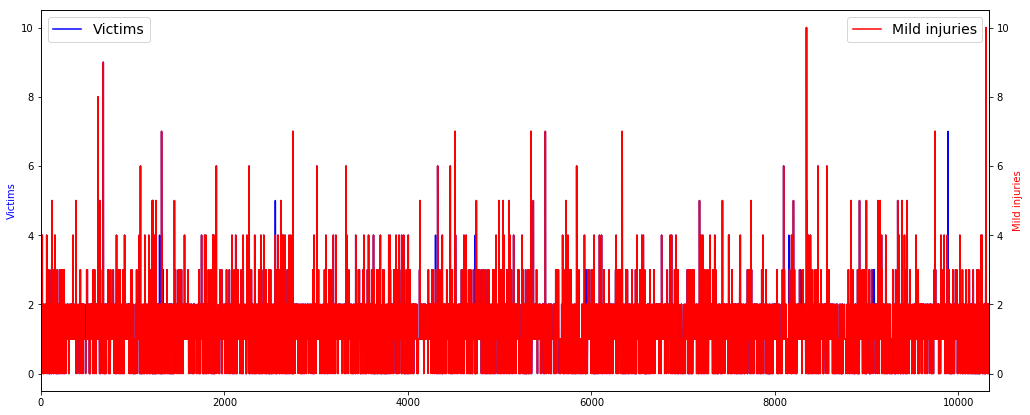

In [40]:
#plot 2 variables 2 axes, same subplot
#plot
new_figure = plt.figure(figsize=(17,7))
#left
ax1 = new_figure.add_subplot(111)
ax1.plot(df[feat1],'b-',label='%s'%(feat1))
ax1.set_ylabel('%s'%(feat1), color='b')
ax1.legend(loc='upper left', fontsize=14)
#right
ax2 = ax1.twinx()
ax2.plot(df[feat2], 'r-',label='%s'%(feat2))
ax2.set_ylabel('%s'%(feat2), color='r')
ax2.legend(loc='upper right', fontsize=14)

plt.xlim(0,len(df[feat1]));

#### Calculating Coefficient of Determination - R Squared

In [41]:
# Calculating SSE
import numpy as np

def sq_err(ys_a, ys_b):

    squarred_error = 0
    for x in range(len(ys_a)):
        squarred_error += (ys_a[x] - ys_b[x]) ** 2
    return squarred_error

# Check the output with some toy data
Y_a = df['Victims']
Y_b = df['Mild injuries']

sq_err(Y_a, Y_b)


297

In [52]:
# Calculating SST and R Squared
def r_squared(ys_real, ys_predicted):
    
    # calculate the numerator
    num = sq_err(ys_real, ys_predicted)
    
    # calculate the denominator
    denom = 0
    for x in ys_real:
        denom += (x - np.mean(ys_real)) ** 2
    return 1 - (num / denom)

# Check the output with some toy data
Y_a = df['Victims']
Y_b = df['Mild injuries']

round(r_squared(Y_a, Y_b),3)


0.947

#### Ordinary Least Squared (OLS)

In [43]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [44]:
df['Mild_injuries'] = df['Mild injuries']

In [45]:
f = "Mild_injuries~Victims"

In [46]:
model = ols(formula=f, data=df).fit()

In [47]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Mild_injuries   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                 1.932e+05
Date:                Thu, 14 Mar 2019   Prob (F-statistic):               0.00
Time:                        18:27:04   Log-Likelihood:                 3816.2
No. Observations:               10339   AIC:                            -7628.
Df Residuals:                   10337   BIC:                            -7614.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0053      0.003     -1.709      0.087      -0.011       0.001
Victims        0.9837      0.002    439.514      0.000       0.979       0.988
==============================================================================
Omnibus:                    13893.148   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2721720.364
Skew:                          -7.808   Prob(JB):                         0.00
Kurtosis:                      80.937   Cond. No.                         3.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
df[(df['Victims'] != df['Mild injuries'])].head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude,Mild_injuries
13,2017S007384,Sant Martí,el Camp de l'Arpa del Clot,Sant Antoni Maria Claret ...,Monday,September,4,16,Afternoon,0,1,1,2,2.176324,41.412546,0
21,2017S007805,Sant Martí,el Camp de l'Arpa del Clot,València / Independència ...,Wednesday,September,20,20,Afternoon,0,1,1,2,2.183407,41.407785,0
30,2017S007303,Sant Martí,el Camp de l'Arpa del Clot,València ...,Thursday,August,31,21,Afternoon,0,1,1,1,2.185811,41.409730,0
211,2017S004804,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",Colom / Antonio López ...,Wednesday,May,31,22,Night,0,1,1,2,2.181974,41.381016,0
307,2017S009133,Eixample,Sant Antoni,Muntaner ...,Sunday,November,5,0,Night,0,1,1,1,2.162809,41.384192,0


In [65]:
df2 = df.loc[:,['Victims', 'Serious injuries']]
df2.head()

,Victims,Serious injuries
0,2,0
1,2,0
2,5,0
3,1,0
4,1,0


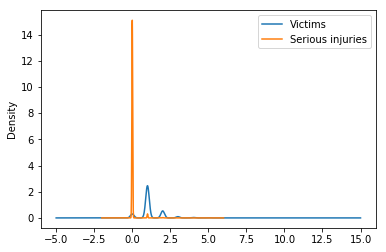

In [66]:
# chacking normality among variables
df2.plot.kde()
plt.show()